### DipLocationWithPhysParm
抽出したdepression構造について，温度を計算した（```ScanTemperature.ipynb```）       
結果，
* dipタイプ：温度の高い山が存在している     

ことがわかった．        

また，水星磁気圏には朝夕非対称が存在している．この温度の高い部分のみを抽出して場所をプロット，朝夕非対称があるのかを見てみる

温度の高い領域として，25MK以上の領域を取り出してみる

In [1]:
import MDUS
from MDUS import Analysis

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
temperature = pd.read_pickle('./data/other/TemperatureAverage.pkl')

In [14]:
temperature.query('T >= 25 and type == "dip"')
print(len(temperature.query('T >= 25 and type == "dip"')))

82


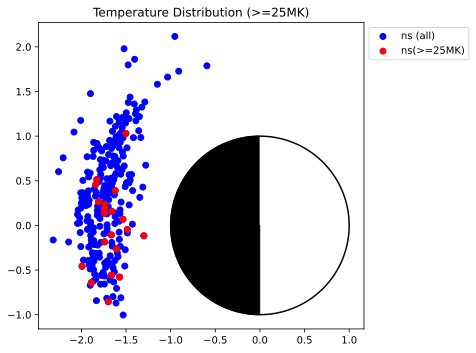

In [71]:
# XY平面でのプロット
fig, ax = plt.subplots()
ax.set_aspect('equal')

# 0から2piまでの0.01刻みのnumpy配列を作成
theta = np.arange(0, 2*np.pi+0.01, 0.01)

ax.plot(np.cos(theta), np.sin(theta), color='black')

# 円のうち，xが負の値の領域を黒で塗りつぶす
ax.fill_between(np.cos(theta), np.sin(theta), where=np.cos(theta) < 0, color='black')

# 全体
# x = temperature.query('T >= 25')['X']
# y = temperature.query('T >= 25')['Y']
# ax.scatter(x, y, color='blue')

# dipタイプのみ
# x = temperature.query('type == "dip"')['X']
# y = temperature.query('type == "dip"')['Y']
# ax.scatter(x, y, color='blue',label='dip (all)')
# x = temperature.query('T >= 25 and type == "dip"')['X']
# y = temperature.query('T >= 25 and type == "dip"')['Y']
# ax.scatter(x, y, color='red', label='dip(>=25MK)')

# nsタイプのみ
x = temperature.query('type == "ns"')['X']
y = temperature.query('type == "ns"')['Y']
ax.scatter(x, y, color='blue',label='ns (all)')
x = temperature.query('T >= 25 and type == "ns"')['X']
y = temperature.query('T >= 25 and type == "ns"')['Y']
ax.scatter(x, y, color='red',label='ns(>=25MK)')

# 凡例の表示
# 図の外側右上に表示
ax.legend(bbox_to_anchor=(1, 1),loc='upper left')
# tight_layoutを使用
plt.tight_layout()
# タイトル
plt.title('Temperature Distribution (>=25MK)')
plt.savefig('./figure/Temperature/temperature_distribution_ns.png',dpi=400)

In [10]:
dip_over = temperature.query('T >= 25 and type == "dip"').index.values

82


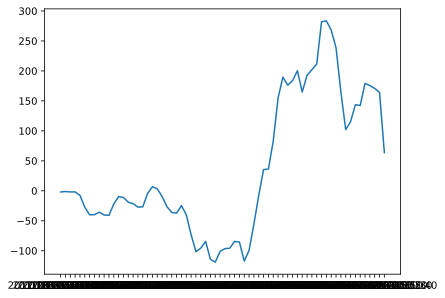

In [23]:
fig, ax = plt.subplots()
ax.plot(rotB.query('index == 199')['date'],rotB.query('index == 199')['Jy'])
# rotB

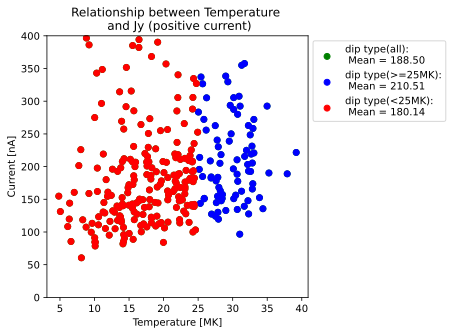

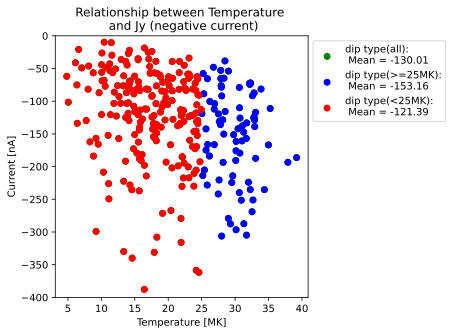

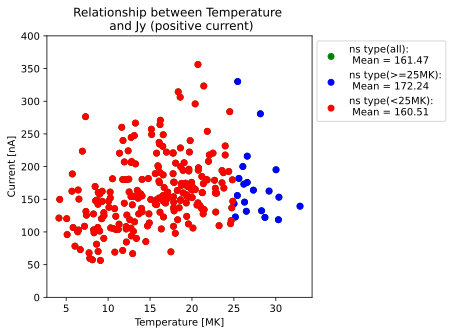

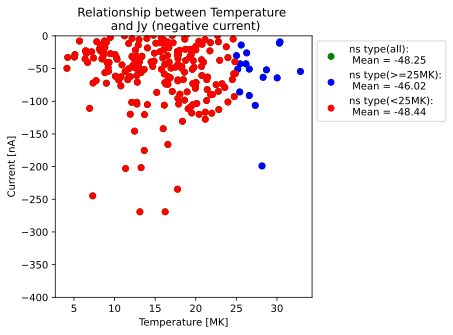

In [66]:
# 電流との相関
rotB = pd.read_pickle('./data/other/rotBcurrent.pkl')
# Jyについて相関を計算
# 全体とJy_right(\partial B_z / \partial x)の相関
# それぞれ計算してプロットしてみる

# dipタイプのindexを取得
dip_over = temperature.query('T >= 25 and type == "dip"').index.values
dip_under = temperature.query('T < 25 and type == "dip"').index.values
dip_all = temperature.query('type == "dip"').index.values
dip_current_positive_over = []
dip_current_negative_over = []
dip_current_positive_under = []
dip_current_negative_under = []
dip_current_positive_all = []
dip_current_negative_all = []
for i in dip_over:
    dip_current_positive_over.append(max(rotB.query('index == @i')['Jy'].values))
    dip_current_negative_over.append(min(rotB.query('index == @i')['Jy'].values))
for i in dip_under:
    dip_current_positive_under.append(max(rotB.query('index == @i')['Jy'].values))
    dip_current_negative_under.append(min(rotB.query('index == @i')['Jy'].values))
for i in dip_all:
    dip_current_positive_all.append(max(rotB.query('index == @i')['Jy'].values))
    dip_current_negative_all.append(min(rotB.query('index == @i')['Jy'].values))
dip_current_positive_over = np.array(dip_current_positive_over)
dip_current_positive_all = np.array(dip_current_positive_all)
dip_current_negative_under = np.array(dip_current_negative_under)
dip_current_positive_under = np.array(dip_current_positive_under)
dip_current_negative_over = np.array(dip_current_negative_over)
dip_current_negative_all = np.array(dip_current_negative_all)

    
# nsタイプのindexを取得
ns_over = temperature.query('T >= 25 and type == "ns"').index.values
ns_under = temperature.query('T < 25 and type == "ns"').index.values
ns_all = temperature.query('type == "ns"').index.values
ns_current_positive_over = []
ns_current_negative_over = []
ns_current_positive_under = []
ns_current_negative_under = []
ns_current_positive_all = []
ns_current_negative_all = []
for i in ns_over:
    ns_current_positive_over.append(max(rotB.query('index == @i')['Jy'].values))
    ns_current_negative_over.append(min(rotB.query('index == @i')['Jy'].values))
for i in ns_under:
    ns_current_positive_under.append(max(rotB.query('index == @i')['Jy'].values))
    ns_current_negative_under.append(min(rotB.query('index == @i')['Jy'].values))
for i in ns_all:
    ns_current_positive_all.append(max(rotB.query('index == @i')['Jy'].values))
    ns_current_negative_all.append(min(rotB.query('index == @i')['Jy'].values))
ns_current_positive_over = np.array(ns_current_positive_over)
ns_current_positive_all = np.array(ns_current_positive_all)
ns_current_negative_under = np.array(ns_current_negative_under)
ns_current_positive_under = np.array(ns_current_positive_under)
ns_current_negative_over = np.array(ns_current_negative_over)
ns_current_negative_all = np.array(ns_current_negative_all)
# print('dip_over:', len(dip_over))
# print('dip_all:', len(dip_all))
# print('ns_over:', len(ns_over))
# print('ns_all:', len(ns_all))
# print('all_over:', len(all_over))
# print('all_all:', len(all_all))

# dipタイプのプロット
# positiveについて
fig, ax = plt.subplots()
ax.set_ylim(0,400)
ax.scatter(temperature.query('index in @dip_all')['T'].values,dip_current_positive_all,color='green',label='dip type(all):\n Mean = {:.2f}'.format(np.mean(dip_current_positive_all[np.where(dip_current_positive_all < 400)])))
ax.scatter(temperature.query('index in @dip_over')['T'].values,dip_current_positive_over,color='blue',label='dip type(>=25MK):\n Mean = {:.2f}'.format(np.mean(dip_current_positive_over[np.where(dip_current_positive_over < 400)])))
ax.scatter(temperature.query('index in @dip_under')['T'].values,dip_current_positive_under,color='red',label='dip type(<25MK):\n Mean = {:.2f}'.format(np.mean(dip_current_positive_under[np.where(dip_current_positive_under < 400)])))
ax.set_xlabel('Temperature [MK]')
ax.set_ylabel('Current [nA]')
ax.legend(bbox_to_anchor=(1, 1),loc='upper left')
ax.set_title('Relationship between Temperature \n and Jy (positive current)')
plt.tight_layout()
plt.savefig('./figure/Current/dip_Jy_positive.png',dpi=400)

# negativeについて
fig, ax = plt.subplots()
ax.set_ylim(-400,0)
ax.scatter(temperature.query('index in @dip_all')['T'].values,dip_current_negative_all,color='green',label='dip type(all):\n Mean = {:.2f}'.format(np.mean(dip_current_negative_all[np.where(dip_current_negative_all > -400)])))
ax.scatter(temperature.query('index in @dip_over')['T'].values,dip_current_negative_over,color='blue',label='dip type(>=25MK):\n Mean = {:.2f}'.format(np.mean(dip_current_negative_over[np.where(dip_current_negative_over > -400)])))
ax.scatter(temperature.query('index in @dip_under')['T'].values,dip_current_negative_under,color='red',label='dip type(<25MK):\n Mean = {:.2f}'.format(np.mean(dip_current_negative_under[np.where(dip_current_negative_under > -400)])))
ax.set_xlabel('Temperature [MK]')
ax.set_ylabel('Current [nA]')
ax.legend(bbox_to_anchor=(1, 1),loc='upper left')
ax.set_title('Relationship between Temperature \n and Jy (negative current)')
plt.tight_layout()
plt.savefig('./figure/Current/dip_Jy_negative.png',dpi=400)

# nsタイプのプロット
# positiveについて
fig, ax = plt.subplots()
ax.set_ylim(0,400)
ax.scatter(temperature.query('index in @ns_all')['T'].values,ns_current_positive_all,color='green',label='ns type(all):\n Mean = {:.2f}'.format(np.mean(ns_current_positive_all[np.where(ns_current_positive_all < 400)])))
ax.scatter(temperature.query('index in @ns_over')['T'].values,ns_current_positive_over,color='blue',label='ns type(>=25MK):\n Mean = {:.2f}'.format(np.mean(ns_current_positive_over[np.where(ns_current_positive_over < 400)])))
ax.scatter(temperature.query('index in @ns_under')['T'].values,ns_current_positive_under,color='red',label='ns type(<25MK):\n Mean = {:.2f}'.format(np.mean(ns_current_positive_under[np.where(ns_current_positive_under < 400)])))
ax.set_xlabel('Temperature [MK]')
ax.set_ylabel('Current [nA]')
ax.legend(bbox_to_anchor=(1, 1),loc='upper left')
ax.set_title('Relationship between Temperature \n and Jy (positive current)')
plt.tight_layout()
plt.savefig('./figure/Current/ns_Jy_positive.png',dpi=400)

# negativeについて
fig, ax = plt.subplots()
ax.set_ylim(-400,0)
ax.scatter(temperature.query('index in @ns_all')['T'].values,ns_current_negative_all,color='green',label='ns type(all):\n Mean = {:.2f}'.format(np.mean(ns_current_negative_all[np.where(ns_current_negative_all > -400)])))
ax.scatter(temperature.query('index in @ns_over')['T'].values,ns_current_negative_over,color='blue',label='ns type(>=25MK):\n Mean = {:.2f}'.format(np.mean(ns_current_negative_over[np.where(ns_current_negative_over > -400)])))
ax.scatter(temperature.query('index in @ns_under')['T'].values,ns_current_negative_under,color='red',label='ns type(<25MK):\n Mean = {:.2f}'.format(np.mean(ns_current_negative_under[np.where(ns_current_negative_under > -400)])))
ax.set_xlabel('Temperature [MK]')
ax.set_ylabel('Current [nA]')
ax.legend(bbox_to_anchor=(1, 1),loc='upper left')
ax.set_title('Relationship between Temperature \n and Jy (negative current)')
plt.tight_layout()
plt.savefig('./figure/Current/ns_Jy_negative.png',dpi=400)

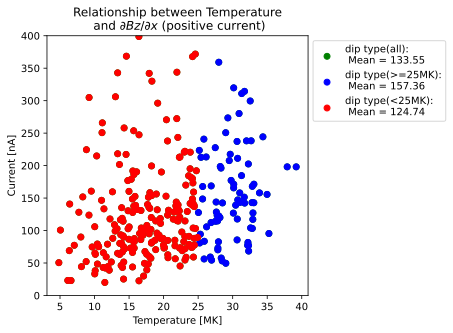

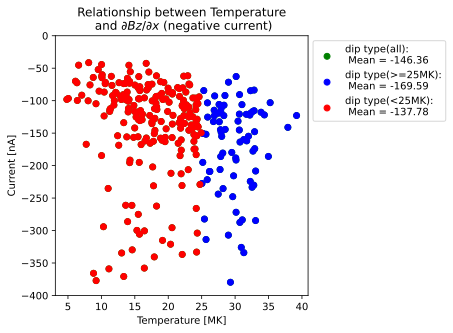

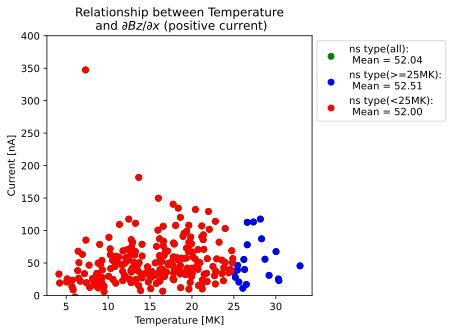

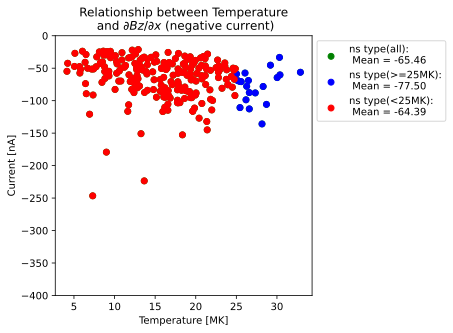

In [67]:
# 電流との相関
rotB = pd.read_pickle('./data/other/rotBcurrent.pkl')
# Jyについて相関を計算
# 全体とJy_right(\partial B_z / \partial x)の相関
# それぞれ計算してプロットしてみる

# dipタイプのindexを取得
dip_over = temperature.query('T >= 25 and type == "dip"').index.values
dip_under = temperature.query('T < 25 and type == "dip"').index.values
dip_all = temperature.query('type == "dip"').index.values
dip_current_positive_over = []
dip_current_negative_over = []
dip_current_positive_under = []
dip_current_negative_under = []
dip_current_positive_all = []
dip_current_negative_all = []
for i in dip_over:
    dip_current_positive_over.append(max(rotB.query('index == @i')['Jy_right'].values))
    dip_current_negative_over.append(min(rotB.query('index == @i')['Jy_right'].values))
for i in dip_under:
    dip_current_positive_under.append(max(rotB.query('index == @i')['Jy_right'].values))
    dip_current_negative_under.append(min(rotB.query('index == @i')['Jy_right'].values))
for i in dip_all:
    dip_current_positive_all.append(max(rotB.query('index == @i')['Jy_right'].values))
    dip_current_negative_all.append(min(rotB.query('index == @i')['Jy_right'].values))
dip_current_positive_over = np.array(dip_current_positive_over)
dip_current_positive_all = np.array(dip_current_positive_all)
dip_current_negative_under = np.array(dip_current_negative_under)
dip_current_positive_under = np.array(dip_current_positive_under)
dip_current_negative_over = np.array(dip_current_negative_over)
dip_current_negative_all = np.array(dip_current_negative_all)

    
# nsタイプのindexを取得
ns_over = temperature.query('T >= 25 and type == "ns"').index.values
ns_under = temperature.query('T < 25 and type == "ns"').index.values
ns_all = temperature.query('type == "ns"').index.values
ns_current_positive_over = []
ns_current_negative_over = []
ns_current_positive_under = []
ns_current_negative_under = []
ns_current_positive_all = []
ns_current_negative_all = []
for i in ns_over:
    ns_current_positive_over.append(max(rotB.query('index == @i')['Jy_right'].values))
    ns_current_negative_over.append(min(rotB.query('index == @i')['Jy_right'].values))
for i in ns_under:
    ns_current_positive_under.append(max(rotB.query('index == @i')['Jy_right'].values))
    ns_current_negative_under.append(min(rotB.query('index == @i')['Jy_right'].values))
for i in ns_all:
    ns_current_positive_all.append(max(rotB.query('index == @i')['Jy_right'].values))
    ns_current_negative_all.append(min(rotB.query('index == @i')['Jy_right'].values))
ns_current_positive_over = np.array(ns_current_positive_over)
ns_current_positive_all = np.array(ns_current_positive_all)
ns_current_negative_under = np.array(ns_current_negative_under)
ns_current_positive_under = np.array(ns_current_positive_under)
ns_current_negative_over = np.array(ns_current_negative_over)
ns_current_negative_all = np.array(ns_current_negative_all)
# print('dip_over:', len(dip_over))
# print('dip_all:', len(dip_all))
# print('ns_over:', len(ns_over))
# print('ns_all:', len(ns_all))
# print('all_over:', len(all_over))
# print('all_all:', len(all_all))

# dipタイプのプロット
# positiveについて
fig, ax = plt.subplots()
ax.set_ylim(0,400)
ax.scatter(temperature.query('index in @dip_all')['T'].values,dip_current_positive_all,color='green',label='dip type(all):\n Mean = {:.2f}'.format(np.mean(dip_current_positive_all[np.where(dip_current_positive_all < 400)])))
ax.scatter(temperature.query('index in @dip_over')['T'].values,dip_current_positive_over,color='blue',label='dip type(>=25MK):\n Mean = {:.2f}'.format(np.mean(dip_current_positive_over[np.where(dip_current_positive_over < 400)])))
ax.scatter(temperature.query('index in @dip_under')['T'].values,dip_current_positive_under,color='red',label='dip type(<25MK):\n Mean = {:.2f}'.format(np.mean(dip_current_positive_under[np.where(dip_current_positive_under < 400)])))
ax.set_xlabel('Temperature [MK]')
ax.set_ylabel('Current [nA]')
ax.legend(bbox_to_anchor=(1, 1),loc='upper left')
ax.set_title('Relationship between Temperature' + '\n' + r' and $\partial Bz/\partial x$ (positive current)')
plt.tight_layout()
plt.savefig('./figure/Current/dip_JyR_positive.png',dpi=400)

# negativeについて
fig, ax = plt.subplots()
ax.set_ylim(-400,0)
ax.scatter(temperature.query('index in @dip_all')['T'].values,dip_current_negative_all,color='green',label='dip type(all):\n Mean = {:.2f}'.format(np.mean(dip_current_negative_all[np.where(dip_current_negative_all > -400)])))
ax.scatter(temperature.query('index in @dip_over')['T'].values,dip_current_negative_over,color='blue',label='dip type(>=25MK):\n Mean = {:.2f}'.format(np.mean(dip_current_negative_over[np.where(dip_current_negative_over > -400)])))
ax.scatter(temperature.query('index in @dip_under')['T'].values,dip_current_negative_under,color='red',label='dip type(<25MK):\n Mean = {:.2f}'.format(np.mean(dip_current_negative_under[np.where(dip_current_negative_under > -400)])))
ax.set_xlabel('Temperature [MK]')
ax.set_ylabel('Current [nA]')
ax.legend(bbox_to_anchor=(1, 1),loc='upper left')
ax.set_title('Relationship between Temperature' + '\n' + r' and $\partial Bz/\partial x$ (negative current)')
plt.tight_layout()
plt.savefig('./figure/Current/dip_JyR_negative.png',dpi=400)

# nsタイプのプロット
# positiveについて
fig, ax = plt.subplots()
ax.set_ylim(0,400)
ax.scatter(temperature.query('index in @ns_all')['T'].values,ns_current_positive_all,color='green',label='ns type(all):\n Mean = {:.2f}'.format(np.mean(ns_current_positive_all[np.where(ns_current_positive_all < 400)])))
ax.scatter(temperature.query('index in @ns_over')['T'].values,ns_current_positive_over,color='blue',label='ns type(>=25MK):\n Mean = {:.2f}'.format(np.mean(ns_current_positive_over[np.where(ns_current_positive_over < 400)])))
ax.scatter(temperature.query('index in @ns_under')['T'].values,ns_current_positive_under,color='red',label='ns type(<25MK):\n Mean = {:.2f}'.format(np.mean(ns_current_positive_under[np.where(ns_current_positive_under < 400)])))
ax.set_xlabel('Temperature [MK]')
ax.set_ylabel('Current [nA]')
ax.legend(bbox_to_anchor=(1, 1),loc='upper left')
ax.set_title('Relationship between Temperature' + '\n' + r' and $\partial Bz/\partial x$ (positive current)')
plt.tight_layout()
plt.savefig('./figure/Current/ns_JyR_positive.png',dpi=400)

# negativeについて
fig, ax = plt.subplots()
ax.set_ylim(-400,0)
ax.scatter(temperature.query('index in @ns_all')['T'].values,ns_current_negative_all,color='green',label='ns type(all):\n Mean = {:.2f}'.format(np.mean(ns_current_negative_all[np.where(ns_current_negative_all > -400)])))
ax.scatter(temperature.query('index in @ns_over')['T'].values,ns_current_negative_over,color='blue',label='ns type(>=25MK):\n Mean = {:.2f}'.format(np.mean(ns_current_negative_over[np.where(ns_current_negative_over > -400)])))
ax.scatter(temperature.query('index in @ns_under')['T'].values,ns_current_negative_under,color='red',label='ns type(<25MK):\n Mean = {:.2f}'.format(np.mean(ns_current_negative_under[np.where(ns_current_negative_under > -400)])))
ax.set_xlabel('Temperature [MK]')
ax.set_ylabel('Current [nA]')
ax.legend(bbox_to_anchor=(1, 1),loc='upper left')
ax.set_title('Relationship between Temperature' + '\n' + r' and $\partial Bz/\partial x$ (negative current)')
plt.tight_layout()
plt.savefig('./figure/Current/ns_JyR_negative.png',dpi=400)

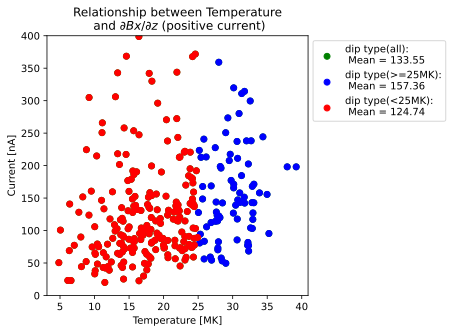

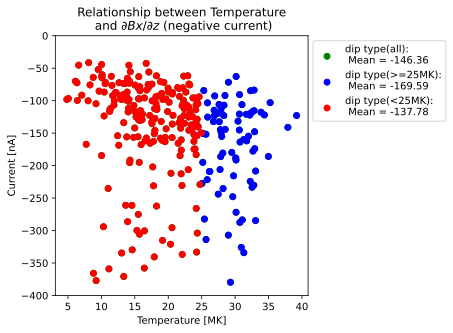

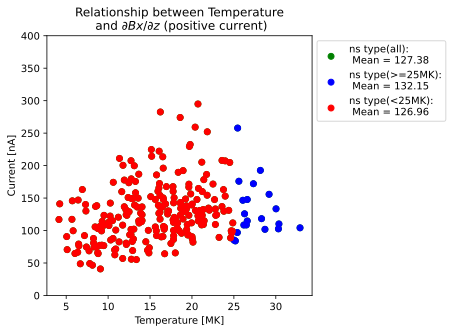

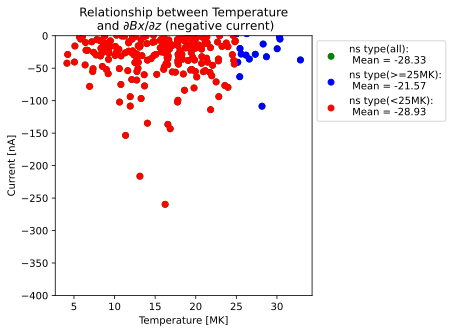

In [65]:
# 電流との相関
rotB = pd.read_pickle('./data/other/rotBcurrent.pkl')
# Jyについて相関を計算
# 全体とJy_right(\partial B_z / \partial x)の相関
# それぞれ計算してプロットしてみる

# dipタイプのindexを取得
dip_over = temperature.query('T >= 25 and type == "dip"').index.values
dip_under = temperature.query('T < 25 and type == "dip"').index.values
dip_all = temperature.query('type == "dip"').index.values
dip_current_positive_over = []
dip_current_negative_over = []
dip_current_positive_under = []
dip_current_negative_under = []
dip_current_positive_all = []
dip_current_negative_all = []
for i in dip_over:
    dip_current_positive_over.append(max(rotB.query('index == @i')['Jy_left'].values))
    dip_current_negative_over.append(min(rotB.query('index == @i')['Jy_left'].values))
for i in dip_under:
    dip_current_positive_under.append(max(rotB.query('index == @i')['Jy_left'].values))
    dip_current_negative_under.append(min(rotB.query('index == @i')['Jy_left'].values))
for i in dip_all:
    dip_current_positive_all.append(max(rotB.query('index == @i')['Jy_left'].values))
    dip_current_negative_all.append(min(rotB.query('index == @i')['Jy_left'].values))
dip_current_positive_over = np.array(dip_current_positive_over)
dip_current_positive_all = np.array(dip_current_positive_all)
dip_current_negative_under = np.array(dip_current_negative_under)
dip_current_positive_under = np.array(dip_current_positive_under)
dip_current_negative_over = np.array(dip_current_negative_over)
dip_current_negative_all = np.array(dip_current_negative_all)

    
# nsタイプのindexを取得
ns_over = temperature.query('T >= 25 and type == "ns"').index.values
ns_under = temperature.query('T < 25 and type == "ns"').index.values
ns_all = temperature.query('type == "ns"').index.values
ns_current_positive_over = []
ns_current_negative_over = []
ns_current_positive_under = []
ns_current_negative_under = []
ns_current_positive_all = []
ns_current_negative_all = []
for i in ns_over:
    ns_current_positive_over.append(max(rotB.query('index == @i')['Jy_left'].values))
    ns_current_negative_over.append(min(rotB.query('index == @i')['Jy_left'].values))
for i in ns_under:
    ns_current_positive_under.append(max(rotB.query('index == @i')['Jy_left'].values))
    ns_current_negative_under.append(min(rotB.query('index == @i')['Jy_left'].values))
for i in ns_all:
    ns_current_positive_all.append(max(rotB.query('index == @i')['Jy_left'].values))
    ns_current_negative_all.append(min(rotB.query('index == @i')['Jy_left'].values))
ns_current_positive_over = np.array(ns_current_positive_over)
ns_current_positive_all = np.array(ns_current_positive_all)
ns_current_negative_under = np.array(ns_current_negative_under)
ns_current_positive_under = np.array(ns_current_positive_under)
ns_current_negative_over = np.array(ns_current_negative_over)
ns_current_negative_all = np.array(ns_current_negative_all)
# print('dip_over:', len(dip_over))
# print('dip_all:', len(dip_all))
# print('ns_over:', len(ns_over))
# print('ns_all:', len(ns_all))
# print('all_over:', len(all_over))
# print('all_all:', len(all_all))

# dipタイプのプロット
# positiveについて
fig, ax = plt.subplots()
ax.set_ylim(0,400)
ax.scatter(temperature.query('index in @dip_all')['T'].values,dip_current_positive_all,color='green',label='dip type(all):\n Mean = {:.2f}'.format(np.mean(dip_current_positive_all[np.where(dip_current_positive_all < 400)])))
ax.scatter(temperature.query('index in @dip_over')['T'].values,dip_current_positive_over,color='blue',label='dip type(>=25MK):\n Mean = {:.2f}'.format(np.mean(dip_current_positive_over[np.where(dip_current_positive_over < 400)])))
ax.scatter(temperature.query('index in @dip_under')['T'].values,dip_current_positive_under,color='red',label='dip type(<25MK):\n Mean = {:.2f}'.format(np.mean(dip_current_positive_under[np.where(dip_current_positive_under < 400)])))
ax.set_xlabel('Temperature [MK]')
ax.set_ylabel('Current [nA]')
ax.legend(bbox_to_anchor=(1, 1),loc='upper left')
ax.set_title('Relationship between Temperature' + '\n' + r' and $\partial Bx/\partial z$ (positive current)')
plt.tight_layout()
plt.savefig('./figure/Current/dip_JyL_positive.png',dpi=400)

# negativeについて
fig, ax = plt.subplots()
ax.set_ylim(-400,0)
ax.scatter(temperature.query('index in @dip_all')['T'].values,dip_current_negative_all,color='green',label='dip type(all):\n Mean = {:.2f}'.format(np.mean(dip_current_negative_all[np.where(dip_current_negative_all > -400)])))
ax.scatter(temperature.query('index in @dip_over')['T'].values,dip_current_negative_over,color='blue',label='dip type(>=25MK):\n Mean = {:.2f}'.format(np.mean(dip_current_negative_over[np.where(dip_current_negative_over > -400)])))
ax.scatter(temperature.query('index in @dip_under')['T'].values,dip_current_negative_under,color='red',label='dip type(<25MK):\n Mean = {:.2f}'.format(np.mean(dip_current_negative_under[np.where(dip_current_negative_under > -400)])))
ax.set_xlabel('Temperature [MK]')
ax.set_ylabel('Current [nA]')
ax.legend(bbox_to_anchor=(1, 1),loc='upper left')
ax.set_title('Relationship between Temperature' + '\n' + r' and $\partial Bx/\partial z$ (negative current)')
plt.tight_layout()
plt.savefig('./figure/Current/dip_JyL_negative.png',dpi=400)

# nsタイプのプロット
# positiveについて
fig, ax = plt.subplots()
ax.set_ylim(0,400)
ax.scatter(temperature.query('index in @ns_all')['T'].values,ns_current_positive_all,color='green',label='ns type(all):\n Mean = {:.2f}'.format(np.mean(ns_current_positive_all[np.where(ns_current_positive_all < 400)])))
ax.scatter(temperature.query('index in @ns_over')['T'].values,ns_current_positive_over,color='blue',label='ns type(>=25MK):\n Mean = {:.2f}'.format(np.mean(ns_current_positive_over[np.where(ns_current_positive_over < 400)])))
ax.scatter(temperature.query('index in @ns_under')['T'].values,ns_current_positive_under,color='red',label='ns type(<25MK):\n Mean = {:.2f}'.format(np.mean(ns_current_positive_under[np.where(ns_current_positive_under < 400)])))
ax.set_xlabel('Temperature [MK]')
ax.set_ylabel('Current [nA]')
ax.legend(bbox_to_anchor=(1, 1),loc='upper left')
ax.set_title('Relationship between Temperature' + '\n' + r' and $\partial Bx/\partial z$ (positive current)')
plt.tight_layout()
plt.savefig('./figure/Current/ns_JyL_positive.png',dpi=400)

# negativeについて
fig, ax = plt.subplots()
ax.set_ylim(-400,0)
ax.scatter(temperature.query('index in @ns_all')['T'].values,ns_current_negative_all,color='green',label='ns type(all):\n Mean = {:.2f}'.format(np.mean(ns_current_negative_all[np.where(ns_current_negative_all > -400)])))
ax.scatter(temperature.query('index in @ns_over')['T'].values,ns_current_negative_over,color='blue',label='ns type(>=25MK):\n Mean = {:.2f}'.format(np.mean(ns_current_negative_over[np.where(ns_current_negative_over > -400)])))
ax.scatter(temperature.query('index in @ns_under')['T'].values,ns_current_negative_under,color='red',label='ns type(<25MK):\n Mean = {:.2f}'.format(np.mean(ns_current_negative_under[np.where(ns_current_negative_under > -400)])))
ax.set_xlabel('Temperature [MK]')
ax.set_ylabel('Current [nA]')
ax.legend(bbox_to_anchor=(1, 1),loc='upper left')
ax.set_title('Relationship between Temperature' + '\n' + r' and $\partial Bx/\partial z$ (negative current)')
plt.tight_layout()
plt.savefig('./figure/Current/ns_JyL_negative.png',dpi=400)